In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import copy
import os

np.set_printoptions(precision=3)

# for colour palette
colours = ["#C96868", "#FADFA1", "#7EACB5"]
pallete = plt.cm.colors.ListedColormap(colours)

# --- image main
save_dir = "../portfolio/themes/blog/static/images"
file_name = "2025-06-27-modified-global-k-means"

# we will also set the random seed to 1
seed = 1
np.random.seed(seed)

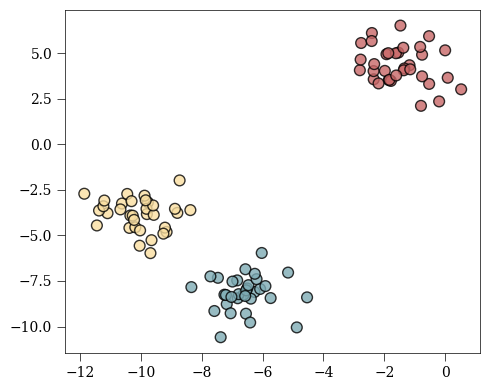

In [75]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    c=clusters,
    cmap=pallete,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    s=60,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-1.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [76]:
w = np.zeros((m, k))
for i in range(m):
    j = np.random.randint(0, k)
    w[i, j] = 1

print(w[:4])

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [77]:
x = np.array([[0.1], [0.2]])
a = np.array([[0.3], [0.4]])

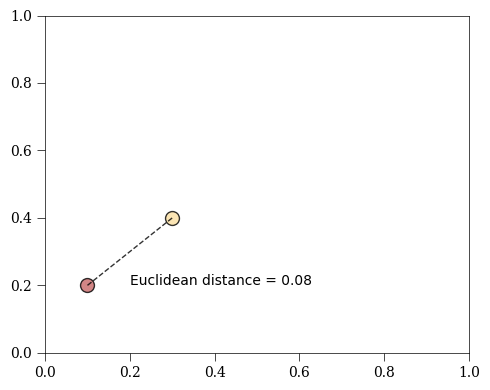

In [78]:
dist = np.sum((x - a) ** 2)

fig, ax = plt.subplots(figsize=(5, 4))

plt.plot(
    [x[0, 0], a[0, 0]],
    [x[1, 0], a[1, 0]],
    c="black",
    linewidth=1,
    linestyle="--",
    alpha=0.8,
)

plt.scatter(
    x[0, 0],
    x[1, 0],
    c=colours[0],
    s=100,
    alpha=0.8,
    edgecolors="black",
    linewidths=1,
)

if x.shape[1] > 1:
    plt.scatter(
        x[0, 1:],
        x[1, 1:],
        c=colours[0],
        s=100,
        alpha=0.3,
        edgecolors="gray",
        linewidths=1,
    )

plt.scatter(
    a[0, 0],
    a[1, 0],
    c=colours[1],
    s=100,
    alpha=0.8,
    edgecolors="black",
    linewidths=1,
)

if a.shape[1] > 1:
    plt.scatter(
        a[0, 1:],
        a[1, 1:],
        c=colours[1],
        s=100,
        alpha=0.3,
        edgecolors="gray",
        linewidths=1,
    )

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.annotate(f"Euclidean distance = {dist:.2f}", (0.2, 0.2), fontsize=10)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)
for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-2.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [79]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)

In [80]:
def init_w(m, k):
    w = np.zeros((m, k))
    for i in range(m):
        j = np.random.randint(0, k)
        w[i, j] = 1
    return w


def init_x(A, m, k):
    return A[np.random.randint(0, m, size=k)]

In [81]:
def obj(x, w, A, m, k):
    """
    x: Cluster centers x^j
    w: Assignment matrix w_ij
    A: a^i in A
    m: Number of data points
    k: Number of clusters
    """
    cost = 0
    for i in range(m):
        for j in range(k):
            if w[i, j] == 1:
                cost += w[i, j] * np.sum((x[j] - A[i]) ** 2)
    return cost / m


w = init_w(m, k)
x = init_x(A, m, k)
costs = obj(x, w, A, m, k)
print(f"Cost: {costs:.4f}")

Cost: 110.6423


In [82]:
def update_x(w, A):
    """
    w: Assignment matrix w_ij
    A: a^i in A
    """
    d = w.sum(axis=0).reshape(-1, 1)
    if np.any(d == 0):
        res = np.zeros_like(w.T @ A)
        mask = d != 0
        m_flat = mask.flatten()
        res[m_flat] = (w.T @ A)[m_flat] / d[mask]
        return res
    else:
        return w.T @ A / d

In [83]:
def init_w(m, k):
    w = np.zeros((m, k))
    for i in range(m):
        j = np.random.randint(0, k)
        w[i, j] = 1
    return w


def init_x(A, m, k):
    return A[np.random.randint(0, m, size=k)]

In [84]:
updated_x = update_x(w, A)
costs = obj(updated_x, w, A, m, k)
print(f"Cost: {costs:.4f}")

Cost: 40.6800


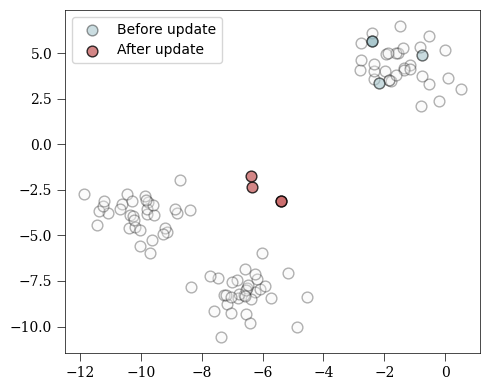

In [85]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[-1],
        s=60,
        alpha=0.4,
        edgecolors="black",
        linewidths=1,
    )
    if i == 0:
        plt.scatter(
            center[0],
            center[1],
            c=colours[-1],
            s=60,
            alpha=0.4,
            edgecolors="black",
            linewidths=1,
            label="Before update",
        )

for i, center in enumerate(updated_x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[0],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
    )

    if i == 0:
        plt.scatter(
            center[0],
            center[1],
            c=colours[0],
            s=60,
            alpha=0.8,
            edgecolors="black",
            linewidths=1,
            label="After update",
        )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-3.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [86]:
def update_w(a, x, m, k):
    """
    a: a^i in A
    x: Cluster centers x^j
    m: Number of data points
    k: Number of clusters
    """
    w = np.zeros((m, k))
    for i in range(m):
        distances = [np.sum((x[j] - a[i]) ** 2) for j in range(k)]
        nearest_cluster = np.argmin(distances)
        w[i, nearest_cluster] = 1
    return w

In [87]:
updated_w = update_w(A, x, m, k)
updated_x = update_x(updated_w, A)
costs = obj(updated_x, updated_w, A, m, k)
print(f"Cost: {costs:.4f}")

Cost: 19.7920


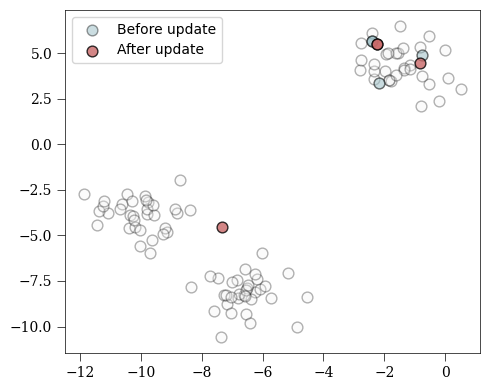

In [88]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[-1],
        s=60,
        alpha=0.4,
        edgecolors="black",
        linewidths=1,
    )
    if i == 0:
        plt.scatter(
            center[0],
            center[1],
            c=colours[-1],
            s=60,
            alpha=0.4,
            edgecolors="black",
            linewidths=1,
            label="Before update",
        )

for i, center in enumerate(updated_x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[0],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
    )

    if i == 0:
        plt.scatter(
            center[0],
            center[1],
            c=colours[0],
            s=60,
            alpha=0.8,
            edgecolors="black",
            linewidths=1,
            label="After update",
        )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-4.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [89]:
def kmeans_iteration(A, x, m, k, max_iters=100):
    """
    A: a^i in A
    x: Cluster centers x^j
    m: Number of data points
    k: Number of clusters
    max_iters: Maximum number of iterations
    """
    x_copy = x.copy()
    for _ in range(max_iters):
        updated_w = update_w(A, x_copy, m, k)
        updated_x = update_x(updated_w, A)
        x_copy = updated_x

    return x_copy, updated_w

In [90]:
updated_x, updated_w = kmeans_iteration(A, x, m, k, max_iters=100)
costs = obj(updated_x, updated_w, A, m, k)
print(f"Cost: {costs:.4f}")

Cost: 6.3645


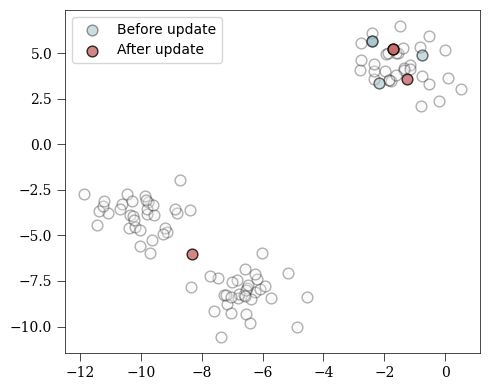

In [91]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[-1],
        s=60,
        alpha=0.4,
        edgecolors="black",
        linewidths=1,
    )
    if i == 0:
        plt.scatter(
            center[0],
            center[1],
            c=colours[-1],
            s=60,
            alpha=0.4,
            edgecolors="black",
            linewidths=1,
            label="Before update",
        )

for i, center in enumerate(updated_x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[0],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
    )

    if i == 0:
        plt.scatter(
            center[0],
            center[1],
            c=colours[0],
            s=60,
            alpha=0.8,
            edgecolors="black",
            linewidths=1,
            label="After update",
        )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-5.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [92]:
MULTISTART = 10
best_cost = np.inf
best_x = None
best_w = None

for _ in range(MULTISTART):
    w = init_w(m, k)
    x = init_x(A, m, k)
    costs = obj(x, w, A, m, k)
    if costs < best_cost:
        best_cost = costs
        best_x = x
        best_w = w

updated_x, updated_w = kmeans_iteration(A, best_x, m, k, max_iters=100)
costs = obj(updated_x, updated_w, A, m, k)
print(f"Cost: {costs:.4f}")

Cost: 1.5628


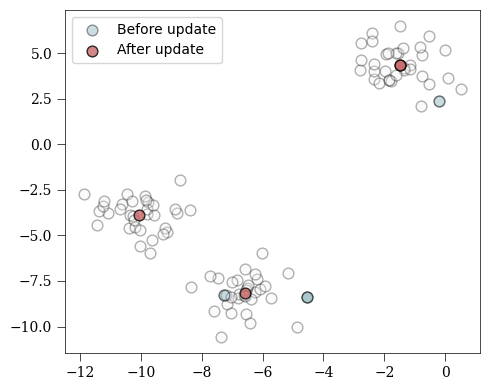

In [93]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[-1],
        s=60,
        alpha=0.4,
        edgecolors="black",
        linewidths=1,
    )
    if i == 0:
        plt.scatter(
            center[0],
            center[1],
            c=colours[-1],
            s=60,
            alpha=0.4,
            edgecolors="black",
            linewidths=1,
            label="Before update",
        )

for i, center in enumerate(updated_x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[0],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
    )

    if i == 0:
        plt.scatter(
            center[0],
            center[1],
            c=colours[0],
            s=60,
            alpha=0.8,
            edgecolors="black",
            linewidths=1,
            label="After update",
        )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-6.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [94]:
def global_kmeans(A, m, k):
    """
    A: a^i in A
    m: Number of data points
    k: Number of clusters
    max_iters: Maximum number of iterations
    """

    past_x = {1: np.mean(A, axis=0).reshape(1, -1)}

    for i in range(2, k + 1):
        best_cost = np.inf
        best_x = None
        best_w = None

        for a in A:
            x = np.vstack((past_x[i - 1], a.reshape(1, -1)))
            x, w = kmeans_iteration(A, x, m, i, max_iters=100)

            cost = obj(x, w, A, m, i)
            if cost < best_cost:
                best_cost = cost
                best_x = x
                best_w = w

        past_x[i] = best_x

    return best_x, best_w

In [95]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)

In [96]:
past_x = {1: np.mean(A, axis=0).reshape(1, -1)}

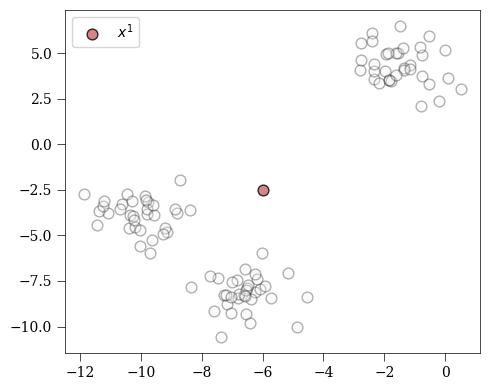

In [97]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)


for i, center in enumerate(past_x[1]):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-7.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [98]:
best_cost = np.inf
best_x = None

i = 2

for a in A:
    x = np.vstack((past_x[i - 1], a.reshape(1, -1)))
    x, w = kmeans_iteration(A, x, m, i, max_iters=100)

    cost = obj(x, w, A, m, i)
    if cost < best_cost:
        best_cost = cost
        best_x = x

past_x[2] = best_x

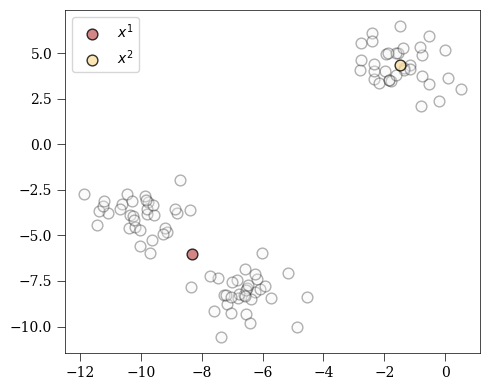

In [99]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)


for i, center in enumerate(past_x[2]):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-8.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [100]:
best_cost = np.inf
best_x = None

i = 3

for a in A:
    x = np.vstack((past_x[i - 1], a.reshape(1, -1)))
    x, w = kmeans_iteration(A, x, m, i, max_iters=100)

    cost = obj(x, w, A, m, i)
    if cost < best_cost:
        best_cost = cost
        best_x = x

past_x[3] = best_x

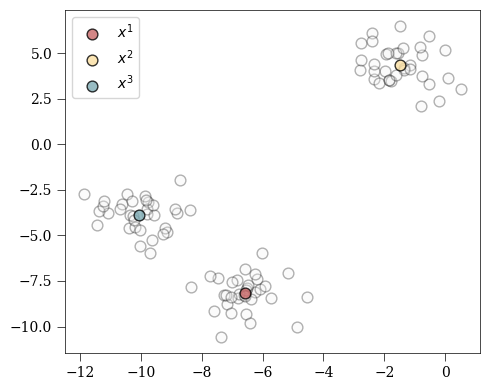

In [101]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)


for i, center in enumerate(past_x[3]):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-9.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [102]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)

global_x, global_w = global_kmeans(A, m, k)
costs = obj(global_x, global_w, A, m, k)
print(f"Cost: {costs:.4f}")

Cost: 1.5628


In [103]:
def component_1(A, current_x, m):
    """
    A: a^i in A
    current_x: x^1, ..., x^{k-1}
    m: Number of data points
    """
    dist = np.zeros(m)
    for i in range(m):
        min_dist = np.inf
        for center in current_x:
            min_dist = min(min_dist, np.sum((center - A[i]) ** 2))
        dist[i] = min_dist
    return dist

In [104]:
def component_2(A, d, m):
    """
    A: a^i in A
    d: d^i_{k-1}
    m: Number of data points
    """
    b_vals = np.zeros(m)
    for j in range(m):
        b_j = 0
        for i in range(m):
            improve = d[i] - np.sum((A[j] - A[i]) ** 2)
            b_j += max(0, improve)
        b_vals[j] = b_j
    return b_vals

In [105]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)

In [106]:
past_x = {1: np.mean(A, axis=0).reshape(1, -1)}
d = component_1(A, past_x[1], m)

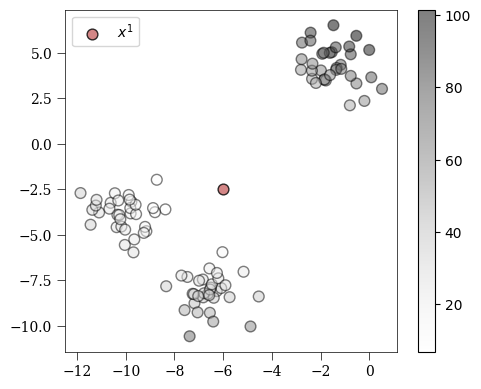

In [107]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    c=d,
    cmap="Greys",
    edgecolors="black",
    linewidths=1,
    alpha=0.5,
    s=60,
)

cbar = plt.colorbar()

for i, center in enumerate(past_x[1]):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-10.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [108]:
b_vals = component_2(A, d, m)

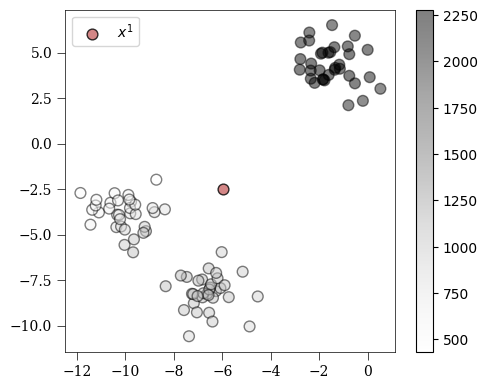

In [109]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    c=b_vals,
    cmap="Greys",
    edgecolors="black",
    linewidths=1,
    alpha=0.5,
    s=60,
)

cbar = plt.colorbar()

for i, center in enumerate(past_x[1]):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-11.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [110]:
past_x[2] = np.vstack((past_x[1], A[np.argmax(b_vals)]))

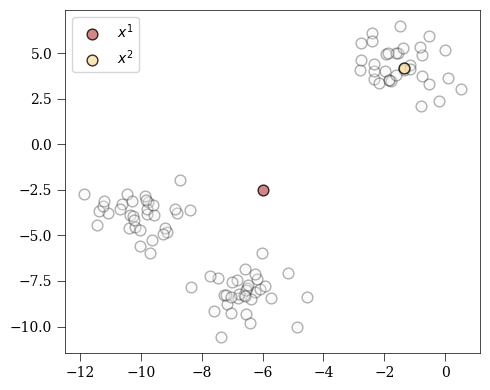

In [111]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(past_x[2]):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-12.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [112]:
i = list(past_x.keys())[-1]
best_x, best_w = kmeans_iteration(A, past_x[i], m, i, max_iters=100)

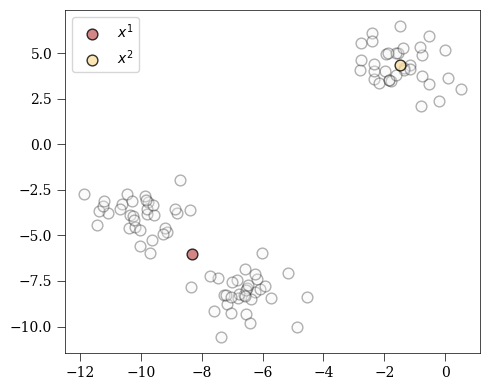

In [113]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(best_x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-13.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [114]:
past_x[2] = best_x
d = component_1(A, past_x[2], m)
b_vals = component_2(A, d, m)

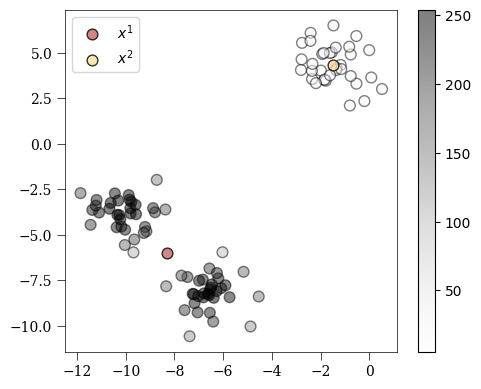

In [115]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    c=b_vals,
    cmap="Greys",
    edgecolors="black",
    linewidths=1,
    alpha=0.5,
    s=60,
)

cbar = plt.colorbar()

for i, center in enumerate(past_x[2]):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-14.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [116]:
past_x[3] = np.vstack((past_x[2], A[np.argmax(b_vals)]))

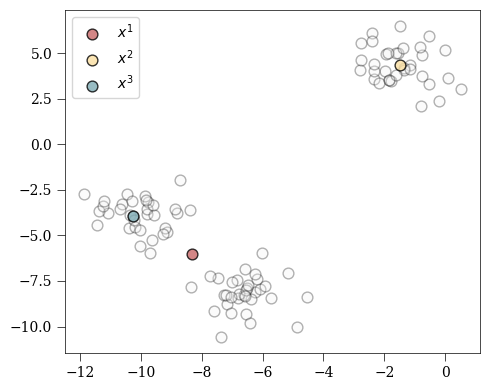

In [117]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(past_x[3]):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-15.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [118]:
i = list(past_x.keys())[-1]
best_x, best_w = kmeans_iteration(A, past_x[i], m, i, max_iters=100)

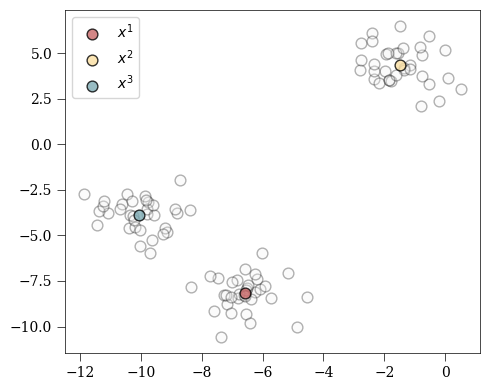

In [119]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    # c=clusters,
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(best_x):
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=f"$x^{i+1}$",
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-16.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [120]:
def fast_global_kmeans(A, m, k):
    """
    A: a^i in A
    m: Number of data points
    k: Number of clusters
    """
    past_x = {1: np.mean(A, axis=0).reshape(1, -1)}
    for i in range(2, k + 1):
        d = component_1(A, past_x[i - 1], m)
        b_vals = component_2(A, d, m)
        x = np.vstack((past_x[i - 1], A[np.argmax(b_vals)]))
        x, w = kmeans_iteration(A, x, m, i, max_iters=100)
        past_x[i] = x

    return past_x[k], w

In [121]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)

In [122]:
%%timeit
best_x, best_w = fast_global_kmeans(A, m, k)

204 ms ± 35.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [123]:
%%timeit
best_x, best_w = global_kmeans(A, m, k)

15.3 s ± 1.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [124]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)

In [125]:
past_x = {1: np.mean(A, axis=0).reshape(1, -1)}
d = component_1(A, past_x[1], m)
b = component_2(A, d, m)

past_x[2] = np.vstack((past_x[1], A[np.argmax(b)]))
I1 = [i for i in range(m) if np.sum((A[i] - past_x[2][-1]) ** 2) >= d[i]]

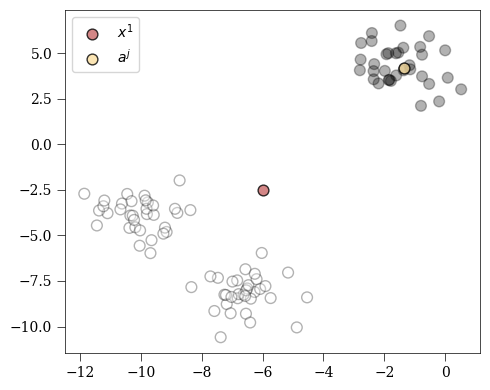

In [126]:
mask = np.ones(len(A), dtype=bool)
mask[I1] = False

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    c=mask,
    cmap="Grays",
    # color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(past_x[2]):

    if i == 0:
        label = f"$x^{i+1}$"
    else:
        label = "$a^j$"
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=label,
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-17.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [127]:
func = lambda i, aj: np.sum((A[i] - aj) ** 2)

I1 = [i for i in range(m) if func(i, past_x[2][-1]) >= d[i]]
I2 = [i for i in range(m) if func(i, past_x[2][-1]) < d[i]]

In [128]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)

In [129]:
past_x = {1: np.mean(A, axis=0).reshape(1, -1)}
d = component_1(A, past_x[1], m)
b = component_2(A, d, m)

past_x[2] = np.vstack((past_x[1], A[np.argmax(b)]))

In [130]:
I1 = [i for i in range(m) if func(i, past_x[2][-1]) >= d[i]]
I2 = [i for i in range(m) if func(i, past_x[2][-1]) < d[i]]

In [131]:
fk_1 = lambda m, d: 1 / m * np.sum(d)
print(fk_1(m, d))

41.18153777704472


In [132]:
fk_2 = lambda m, d, I1, I2: 1 / m * (np.sum(d[I1]) + np.sum(d[I2]))
fk_2(m, d, I1, I2)

41.18153777704472

In [133]:
np.equal(fk_1(m, d), fk_2(m, d, I1, I2))

True

In [134]:
def auxiliary_function(y, A, d):
    costs = 0.0
    for i, a_i in enumerate(A):
        costs += min(d[i], np.sum((y - a_i) ** 2))
    return costs / len(A)

In [148]:
# make 3 clusters
k = 3
m = 100
n = 2

A, clusters = make_blobs(n_samples=m, centers=k, n_features=n, random_state=1)

In [136]:
past_x = {1: np.mean(A, axis=0).reshape(1, -1)}
d = component_1(A, past_x[1], m)
b = component_2(A, d, m)

d0 = [j for j in range(m) if b[j] > 0]

In [137]:
best_cost = np.inf
starting_point = None

for j in d0:
    s2 = [i for i in range(m) if np.sum((A[j] - A[i]) ** 2) < d[i]]
    y = np.mean(A[s2], axis=0)
    cost = auxiliary_function(y, A, d)

    if cost < best_cost:
        best_cost = cost
        starting_point = y

In [138]:
MAX_ITER = 10

y = starting_point.copy()

for iter in range(MAX_ITER):
    tmp_s2 = [i for i in range(m) if np.sum((y - A[i]) ** 2) < d[i]]

    if tmp_s2 == s2:
        break

    if len(tmp_s2) > 0:
        y = np.mean(A[tmp_s2], axis=0)

    s2 = tmp_s2

In [139]:
past_x[2] = np.vstack((past_x[1], y))

In [140]:
i = list(past_x.keys())[-1]
past_x[i], best_w = kmeans_iteration(A, past_x[i], m, i, max_iters=100)

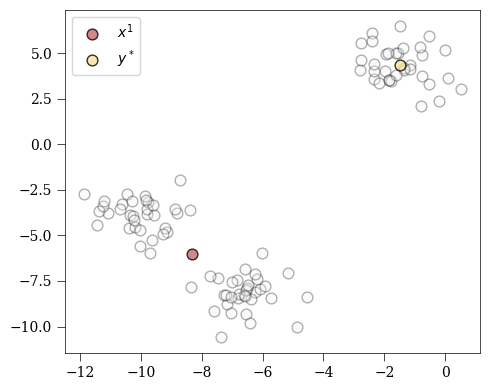

In [141]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    color="whitesmoke",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=60,
)

for i, center in enumerate(past_x[i]):

    if i == 0:
        label = f"$x^{i+1}$"
    else:
        label = "$y^*$"
    plt.scatter(
        center[0],
        center[1],
        c=colours[i],
        s=60,
        alpha=0.8,
        edgecolors="black",
        linewidths=1,
        label=label,
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
# plt.savefig(
#     f"{save_dir}/{file_name}-17.svg", dpi=75, bbox_inches="tight", edgecolor="none"
# )
plt.show()

In [142]:
def get_s2(A, y, d, m):
    return [i for i in range(m) if np.sum((A[i] - y) ** 2) < d[i]]


def initial_y(A, d, d0):
    best_cost = np.inf
    best_y = None
    m = len(A)

    for j in d0:
        s2 = get_s2(A, A[j], d, m)

        if s2:
            y = np.mean(A[s2], axis=0)
        else:
            y = A[j]

        cost = auxiliary_function(y, A, d)
        if cost < best_cost:
            best_cost = cost
            best_y = y

    return best_y


def improve_y(A, starting_point, d, max_iter=100):
    y = starting_point.copy()
    m = len(A)
    prev_s2 = []

    for _ in range(max_iter):
        s2 = get_s2(A, y, d, m)

        if set(s2) == set(prev_s2):
            break

        if s2:
            y = np.mean(A[s2], axis=0)

        prev_s2 = s2

    return y

In [143]:
def modified_global_kmeans(A, max_k=20, tol=0.05, max_iter=100):
    """
    A: Dataset points a^i in A
    max_k: Maximum number of clusters to try
    tol: Tolerance for relative improvement
    max_iter: Max no of iterations for k-means
    """
    past_x = {1: np.mean(A, axis=0).reshape(1, -1)}
    m = len(A)
    w = init_w(m, 1)

    f1 = obj(x=past_x[1], w=w, A=A, m=m, k=1)
    f_prev = f1
    k = 1

    for i in range(2, max_k + 1):
        d = component_1(A, past_x[i - 1], m)
        b = component_2(A, d, m)
        d0 = [j for j in range(m) if b[j] > 0]
        
        if len(d0) == 0:
            break

        tmp_y = initial_y(A, d, d0)
        y = improve_y(A, tmp_y, d, max_iter=max_iter)
        x = np.vstack((past_x[i - 1], y.reshape(1, -1)))
        x, w = kmeans_iteration(A, x, m, i, max_iters=max_iter)

        fk = obj(x=x, w=w, A=A, m=m, k=i)
        relative_improvement = (f_prev - fk) / f1

        if relative_improvement < tol:
            break

        past_x[i] = x
        f_prev = fk 
        k = i

    return past_x[k], w

In [144]:
%%timeit
best_x, best_w = fast_global_kmeans(A, m, k)

205 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
best_x, best_w = global_kmeans(A, m, k)

15.9 s ± 847 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
best_x, best_w = modified_global_kmeans(A, k, tol=0.05, max_iter=100)

263 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
k = 6
m = 500
n = 15

A, clusters = make_blobs(
    n_samples=m,
    centers=k,
    n_features=n,
    cluster_std=3.0,  
    center_box=(-5, 5),  
    random_state=1
)

# ----
best_x, best_w = global_kmeans(A, m, k)
print(obj(x=best_x, w=best_w, A=A, m=m, k=len(best_x)))

best_x, best_w = fast_global_kmeans(A, m, k)
print(obj(x=best_x, w=best_w, A=A, m=m, k=len(best_x)))

best_x, best_w = modified_global_kmeans(A, tol=0.01)
print(obj(x=best_x, w=best_w, A=A, m=m, k=len(best_x)))

133.0595253200318
133.06139805036113
128.0590167276766
